<a href="https://colab.research.google.com/github/gautaman8/cnn_melanoma/blob/main/CNN_melanoma_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [24]:
# Mounting from gdrive
from google.colab import drive
drive.mount('/CNN_Melanoma', force_remount=True)

Mounted at /CNN_Melanoma


**Define directory paths for test and train data**

In [28]:
data_dir_train = pathlib.Path("/CNN_Melanoma/MyDrive/CNN_Melanoma/Train")

In [27]:
data_dir_test = pathlib.Path("/CNN_Melanoma/MyDrive/CNN_Melanoma/Test")

In [29]:
# print the image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# Load using keras.preprocessing




**Create a dataset**

Data preprocessing to resize images and split trainging and validation data

In [31]:
batch_size = 32
img_height = 180
img_width = 180

In [33]:
# training dataset with 80% of training data initialised
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,  # You can adjust the validation split as needed
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [35]:
# validation dataset with 20% of the training data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.8,  # You can adjust the validation split as needed
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 448 files for training.


In [36]:
# Print all class names
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Visualisation for one instance of all the 9 classes


In [ ]:

import matplotlib.pyplot as plt

unique_visual =  {class_name : None for class_name in class_names}

# find unique_visuals for each class name
for images, labels in train_ds:
    for image, label in zip(images, labels):
        class_name = class_names[label]
        if unique_visual[class_name] is None:
            unique_visual[class_name] = image.numpy()
            # count +=1
            break




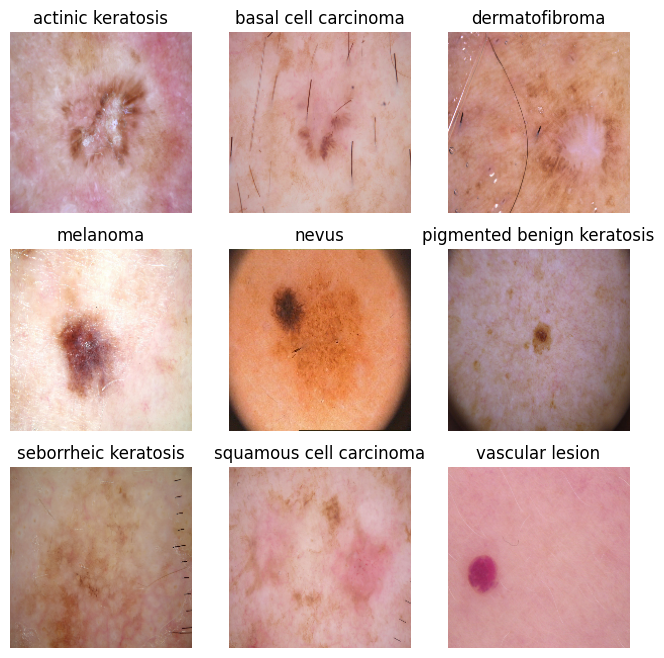

In [42]:
# Display visuals in a 3x3 grid for all 9 classes
plt.figure(figsize=(8, 8))
for i, (class_name, image) in enumerate(unique_visual.items()):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.astype("uint8"))
    plt.title(class_name)
    plt.axis("off")

plt.show()

In [43]:
# Some settings for prefetch, to enable parallel processing between each epoch
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create a Simple CNN model

In [45]:
import tensorflow as tf
from keras import layers, models

# Define the input shape and preprocessing layer to normalize pixel values
input_shape = (180, 180, 3)  # Adjust the input shape based on your image size
preprocessing_layer = layers.experimental.preprocessing.Rescaling(1.0 / 255)




In [46]:
# Create CNN model
model = models.Sequential([
    # Color standardization layer to rescale pixel values to [0, 1]
    layers.Input(shape=input_shape),
    layers.experimental.preprocessing.Rescaling(1.0 / 255),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 output classes
])

In [48]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 64)       

**Model Training and analysis**

In [50]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 155s 2s/step - loss: 2.0245 - accuracy: 0.2740 - val_loss: 1.6992 - val_accuracy: 0.3884
Epoch 2/20
56/56 [==============================] - 117s 2s/step - loss: 1.6819 - accuracy: 0.3968 - val_loss: 1.5333 - val_accuracy: 0.4621
Epoch 3/20
56/56 [==============================] - 114s 2s/step - loss: 1.5420 - accuracy: 0.4403 - val_loss: 1.3819 - val_accuracy: 0.5513
Epoch 4/20
56/56 [==============================] - 118s 2s/step - loss: 1.4725 - accuracy: 0.4905 - val_loss: 1.3952 - val_accuracy: 0.5179
Epoch 5/20
56/56 [==============================] - 123s 2s/step - loss: 1.3378 - accuracy: 0.5262 - val_loss: 1.2924 - val_accuracy: 0.5513
Epoch 6/20
56/56 [==============================] - 124s 2s/step - loss: 1.2877 - accuracy: 0.5419 - val_loss: 1.1936 - val_accuracy: 0.6049
Epoch 7/20
56/56 [==============================] - 119s 2s/step - loss: 1.2156 - accuracy: 0.5698 - val_loss: 1.1647 - val_accuracy: 0.5915
Epoch 8/20
56

**Visualising training results**

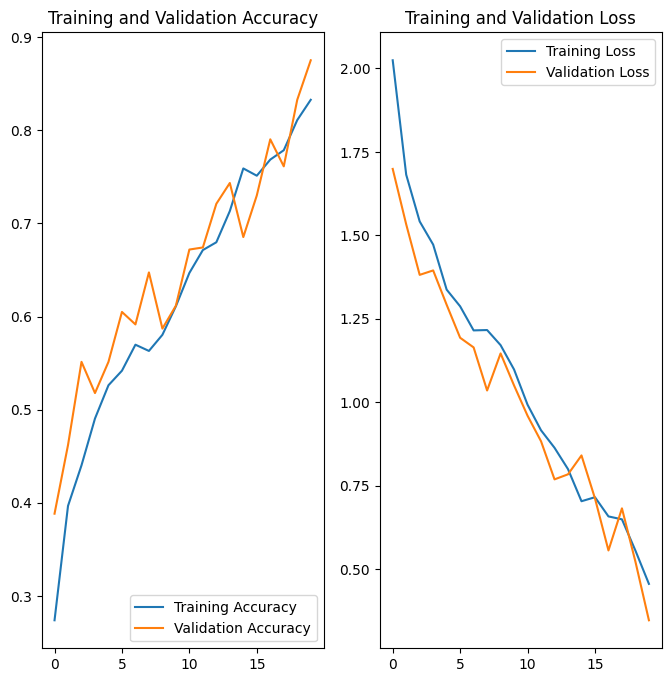

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings

1. Training accuracy has improved with each epoch and the validation accuracy is corresponding to the improved training accuracy.
2. Likewise Training and validation loss is minimised with each epoch
3. The data is corresponding well and shows the learning is converging very well with 20 epochs.
4. There is no overfitting or underfitting as training improvements match with corresponding validation improvements.
5. This could be attempted to be run by increasing the epochs further to see if the accuracy and loss can be improved even further.
6. Next we're gonna attempt to use Augmentation


# Augmentation

### Sample visualisation

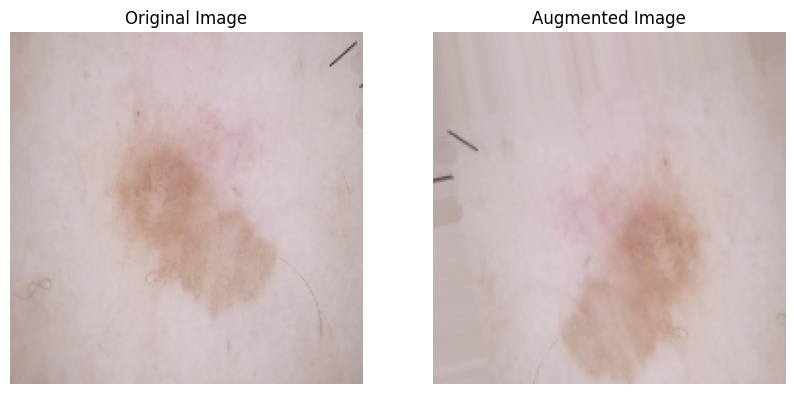

In [66]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
from keras.preprocessing.image import ImageDataGenerator

data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Select one image from the training dataset
for images, labels in train_ds.take(1):
    image = images[0]  # Take the first image in the batch

# Create a grid to display both the original and augmented images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image.numpy().astype("uint8"))
plt.title("Original Image")
plt.axis("off")

# Augmented image
plt.subplot(1, 2, 2)
augmented_image = data_augmentation.random_transform(image)
plt.imshow(augmented_image.astype("uint8"))
plt.title("Augmented Image")
plt.axis("off")

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Initialize lists to collect accuracy and loss data
training_accuracy = []
training_loss = []
validation_accuracy = []
validation_loss = []

# Training loop with data augmentation
for epoch in range(epochs):
    for images, labels in train_ds:
        # Apply data augmentation to the training images
        augmented_images = data_augmentation.flow(images, labels, batch_size=batch_size)

        # Train the model with augmented images and collect history
        history = model.fit(augmented_images, epochs=1, verbose=0)

        # Append accuracy and loss data to the lists
        training_accuracy.append(history.history['accuracy'][0])
        training_loss.append(history.history['loss'][0])

    # Collect validation accuracy and loss for this epoch
    validation_metrics = model.evaluate(val_ds, verbose=0)
    validation_accuracy.append(validation_metrics[1])  # Index 1 is accuracy
    validation_loss.append(validation_metrics[0])  # Index 0 is loss

# Now you can plot the training and validation accuracy and loss using the history collected
